# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Ryan Anthony G. Maghuyop \
_Student No._: 2020-03987 \
_Section_: THU-HX-3 \

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Ryan Anthony G. Maghuyop

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1. and 2.
N = 10
a = 0.0
b = 5.0

#The exact answer is
S = 1450

def f(x): #Given polynomial function
  return 2*x**4 + 3*x**2 + 4*x + 5

def integ_trap(N, a, b): #(1)
  s = 0.5*f(a) + 0.5*f(b)
  h = (b-a)/N
  for k in range(1,N):
    s += f(a+k*h)
  return(s*h)

for j in range(1,4): #(2)
  N = 10**j
  error_t = (integ_trap(N,a,b) - S)*100/S
  print("The numerical calculation using the trapezoidal rule using " + str(N) + " slices is " + str(integ_trap(N,a,b)) + ". The % error is " + str(error_t) + ".")

#3. and 4.
def integ_simp(N, a, b):
  h = (b-a)/N
  s = f(a) + f(b)
  for k in range(1,N,2):
    s += 4*f(a+k*h)
  for k in range(2,N,2):
    s += 2*f(a+k*h)
  s = s*(1./3)*h
  return(s)

for j in range(1,4):
    N = 10**j
    error_s = (integ_simp(N,a,b) - S)*100/S
    print("The numerical calculation using Simpson's rule using " + str(N) + " slices is " + str(integ_simp(N,a,b)) + ". The % error is " + str(error_s) + ".")


The numerical calculation using the trapezoidal rule using 10 slices is 1471.4375. The % error is 1.478448275862069.
The numerical calculation using the trapezoidal rule using 100 slices is 1450.2145812500003. The % error is 0.01479870689656999.
The numerical calculation using the trapezoidal rule using 1000 slices is 1450.0021458331234. The % error is 0.00014798849127240326.
The numerical calculation using Simpson's rule using 10 slices is 1450.0833333333333. The % error is 0.005747126436776382.
The numerical calculation using Simpson's rule using 100 slices is 1450.0000083333337. The % error is 5.747126657485657e-07.
The numerical calculation using Simpson's rule using 1000 slices is 1450.0000000008342. The % error is 5.753338035870472e-11.


1 and 2. This is just the exact formulation of the trapezoidal rule. \
  (1) We define the trapezoidal rule as a function with the number of slices, lower and upper bound of the integral as inputs. \
  (2) We loop $N = 10^j$ for $j$ from 1-3 to get 10, 100, and 1000 slices for our function. We use each value of N to print the value of *integ_trap* and *error_t*. \
Increasing the number of slices by a factor of $10^a$ decreases the % error by a factor of $10^{2a}$.

3 and 4. Similarly, this is just the exact formulation of the Simpson's rule. We follow the same template from the first part. Notice that the % error when using the Simpson's rule is lower compared to the trapezoidal rule for similar numbers of slices. Increasing the number of slices by a factor of $10^a$ decreases the % error by a factor of $10^{4a}$.

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [190]:
#1.
def gaussxw(N):
  #Initial approximation to roots of the Legendre polynomial
  a = np.linspace(3,4*N-1,N)/(4*N+2)
  x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

  #Find roots using Newton's method
  epsilon = 1e-15
  delta = 1.0
  while delta>epsilon:
    p0 = np.ones(N,float)
    p1 = np.copy(x)
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx
    delta= max(abs(dx))

  # Calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

  return x,w

def gaussxwab(N,a,b):
  x,w = gaussxw(N)
  u = 0.5*(b-a)*x+0.5*(b+a)
  v = 0.5*(b-a)*w
  return u,v

#2.
N = 3
a = 0
b = 5

def integ_gaussq(N,a,b,func): #(1)
  u,v = gaussxwab(N,a,b)
  s = 0
  s += func(u)*v
  return sum(s)

error_g = (integ_gaussq(N,a,b,f) - S)*100/S #% error of Gaussian quadrature method

print("The numerical calculation using Gaussian quadrature using " + str(N) + " slices is " + str(integ_gaussq(N,a,b,f)) + ". The % error is " + str(error_g) + ".")

The numerical calculation using Gaussian quadrature using 3 slices is 1450.000000000002. The % error is 1.4112848820614404e-13.


(1) To take the integral of a function using Gaussian quadrature, we first take the outputs of the defined *gaussxwab* function $u$ and $v$, corresponding to the sample points $x_k$ and the corresponding weights $w_k$, respectively. Note that both $u$ and $v$ here are arrays with $N$ elements. We then simply multiply the matching $f(x_k)$'s and $w_k$'s and add the elements of the resulting array to get the integral approximation.

Note that despite only using 3 slices, the degree of error using this method is two magnitudes lower than the Simpson's rule using 1000 slices.


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

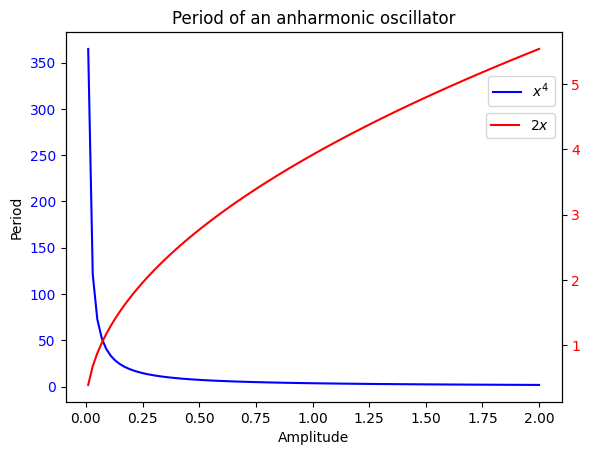

In [186]:
from matplotlib import color_sequences
#1.
m = 1
N = 20

def V(x):# Given potential function
  return x**4

def V1(x): #Sample potential function for comparison of results
  return 2*x

def T(b, func): #Period function. I put an extra "func" input here to allow for comparison of other potential functions.
  a = 0 #Lower bound of integral, not to be confused with the amplitude b. We can hard code this inside the function since the lower bound in the definition of the period is set to zero.
  def integrand(x): #Function inside the integral, to be used as input "func"
    return (np.sqrt(func(b)-func(x)))**(-1)
  return np.sqrt(8*m)*integ_gaussq(N,a,b,integrand)

#2.

x = np.linspace(0.01,2,100) #Range of values for amplitude b. I decided to start with 0.01 to avoid NaN error for b=0.
t = [] #Empty list to be appended with values of T(b)
t1 = [] #Another empty list for T(b) values of the sample potential function.
for k in x:
  t.append(T(k,V))
  t1.append(T(k,V1))
fig, ax = plt.subplots()
ax.set_xlabel("Amplitude")
ax.set_ylabel("Period")
ax.plot(x,t, color = 'blue', label = '$x^4$')
ax.tick_params(axis='y', labelcolor = 'blue')
ax.set_title("Period of an anharmonic oscillator")

ax1 = ax.twinx() #Sample potential for comparison
ax1.tick_params(axis='y', labelcolor = 'red')
ax1.plot(x,t1, color = 'red', label = '$2x$')
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9)) #Set location manually for better visualization
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.8)) #Set location manually for better visualization
plt.show()

As seen in the graph, there exists an inverse relationship between the period and the amplitude of an anharmonic oscillator, for the given potential $V(x) = x^4$. As seen in the graph, for a potential function $V(x) = 2x$, we see that as the amplitude increases, the period also increases. This is due to the integral in the expression for the period. \\

\begin{split}
T &= \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} \\
&\sim EllipticF(sin^{-1}\left(\frac{x}{2}\right),-1) \  \text{ for $V(x) = x^4$ at $a=2$}\\
&= 4(\sqrt{a}-\sqrt{a-2}) \qquad \text{ for $V(x) = 2x$}
\end{split}

It turns out, solving the integral analytically for $V(x) = x^4$ results into an elliptic function of the first kind. Plugging in values of $a$ from $0$ to $2$ results in this asymptotic looking graph with decreasing values for increasing $a$. Solving the integral analytically for $V(x) = 2x$ results in $T \sim \sqrt{a}-\sqrt{a-2}$, which explains the direct relationship for this sample potential.